## Assignment:

Beat the performance of my Lasso regression by **using different feature engineering steps ONLY!!**.

The performance of my current model, as shown in this notebook is:

- test mse: 1063016789.3316755
- test rmse: 32603.938248801718
- test r2: 0.8453144708738004

To beat my model you will need a test r2 bigger than 0.85 and a rmse smaller than 32603.


=====================================================================================================


### Conditions:

- You MUST NOT change the hyperparameters of the Lasso.
- You MUST use the same seeds in Lasso and train_test_split as I show in this notebook (random_state)
- You MUST use all the features of the dataset (except Id) - you MUST NOT select features


=====================================================================================================


### If you beat my model:

Make a pull request with your notebook to this github repo:
https://github.com/solegalli/udemy-feml-challenge

And add your notebook to the folder:

-StudentsSolutions_v1.0.0

### How to make the PR

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the **fork** button at the top-right

2) clone your forked repo into your local computer:

- Go to www.github.com/yourusername/udemy-feml-challenge
- Click the green button that says clone or download
- copy the url that opens up
- power up a git console
- type: git clone (paste the url you copied from github)
- done

3) Make a copy of the jupyter notebook and add your name:

- Open up the Jupyter notebook called 13-Assignement.ipynb
- Click the "File" button at the top-right and then click "Make a copy"
- **Work your solution in the Copy** and not in the original assignment (otherwise there will be conflicts when making the PR)
- Change the name of the copy of the notebook to: 13-Assignement_yourname.ipynb
- Move the notebook to the folder **StudentsSolutions_v1.0.0**
- done

When you finish, just commit the new notebook to your fork and then make a PR to my repo.

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.


## But i have a notebook ready and I haven't cloned the repo yet, how can I make the PR?

If you worked in the copy you downloaded from Udemy before forking and cloning this repo, then follow this steps:

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the fork button at the top-right

2) clone your forked repo into your local computer:

Go to www.github.com/yourusername/udemy-feml-challenge

- Click the green button that says clone or download
- Copy the url that opens up
- Power up a git console
- Type: git clone (paste the url you copied from github)
- Done

3) Rename your solution as follows and copy it into your cloned repo:

- Rename your solution notebook to: 13-Assignement_yourname.ipynb
- Copy this file into the cloned repo, inside the folder **StudentsSolutions_v1.0.0**
- Done

When you finish, just commit the new notebook to your fork and then make a PR to my repo

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.

**Good luck!!**

## House Prices dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.pandas.set_option('display.max_columns', None)

### Load Datasets

In [2]:
data = pd.read_csv('~/hdd/hdd2/code/house-prices-advanced-regression-techniques/houseprice.csv')
data=data.drop(labels=['Id'],axis=1)

In [3]:
categorical=[i for i in data.columns if data[i].dtype=='O']
numerical=[i for i in data.columns if (i not in categorical)&(i!='SalePrice')]
year=[i for i in numerical if 'Yr' in i or 'Year' in i]
continous=[i for i in numerical if (data[i].nunique()>=50)&(i not in year)]
discrete=[i for i in numerical if (data[i].nunique()<50)&(i not in year)]

del numerical

print('There are {} continuous variables'.format(len(continous)))
print('There are {} discrete variables'.format(len(discrete)))
print('There are {} temporal variables'.format(len(year)))
print('There are {} categorical variables'.format(len(categorical)))

There are 15 continuous variables
There are 17 discrete variables
There are 4 temporal variables
There are 43 categorical variables


### Separate train and test set

In [4]:
from sklearn.model_selection import train_test_split as TTS

In [5]:
x_train, x_test, y_train, y_test = TTS(data.drop(['SalePrice'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.1,
                                                    random_state=0)

In [6]:
def year_extract(data,year):
    year_dict={}
    for i in year:
        if i != 'YrSold':
            data[i]=data['YrSold']-data[i]
    data.drop('YrSold', axis=1, inplace=True)
    return data

In [7]:
x_train = year_extract(x_train, year)
x_test = year_extract(x_test, year)

In [8]:
year.remove('YrSold')

In [9]:
final_columns = x_train.columns

## Feature Engineering Pipeline

In [10]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from feature_engine.discretisation import DecisionTreeDiscretiser as DTD
from feature_engine.encoding import (
    DecisionTreeEncoder as DTE,
    RareLabelEncoder as RLE
)
from feature_engine.imputation import (
    AddMissingIndicator as AMI,
    ArbitraryNumberImputer as ANI,
    CategoricalImputer as CI
)

In [11]:
house_pipe = Pipeline([
    
    ('missing_ind', AMI(
        variables=['LotFrontage','GarageYrBlt'])),
    
    ('imputer_num', ANI(
        arbitrary_number=0,
        variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    
    ('imputer_cat', CI(
        variables=categorical)),
    
    ('discretisation',DTD(
        random_state=1,
        variables=discrete+continous+year)),

    ('rare_label_enc', RLE(
        tol=0.008, 
        n_categories=1, 
        variables=categorical)),
    
    ('categorical_enc',DTE(
        random_state=1,
        variables= categorical)),

    ('scaler', MaxAbsScaler()),
    
    ('lasso', Lasso(random_state=0))
])

In [12]:
house_pipe.fit(x_train, y_train)

Pipeline(steps=[('missing_ind',
                 AddMissingIndicator(variables=['LotFrontage', 'GarageYrBlt'])),
                ('imputer_num',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['LotFrontage', 'MasVnrArea',
                                                   'GarageYrBlt'])),
                ('imputer_cat',
                 CategoricalImputer(variables=['MSZoning', 'Street', 'Alley',
                                               'LotShape', 'LandContour',
                                               'Utilities', 'LotConfig',
                                               'LandSlope', 'Neighborho...
                                                'LandSlope', 'Neighborhood',
                                                'Condition1', 'Condition2',
                                                'BldgType', 'HouseStyle',
                                                'RoofStyle', 'RoofMatl',
              

In [13]:
x_train_preds = house_pipe.predict(x_train)
x_test_preds = house_pipe.predict(x_test)

In [14]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
print('train mse: {}'.format(mean_squared_error(y_train, x_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, x_train_preds))))
print('train r2: {}'.format(r2_score(y_train, x_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, x_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, x_test_preds))))
print('test r2: {}'.format(r2_score(y_test, x_test_preds)))

train mse: 566250486.6119391
train rmse: 23796.01829323425
train r2: 0.9093104206190826

test mse: 880317212.7177948
test rmse: 29670.140085914572
test r2: 0.8719001099373364


Text(0, 0.5, 'Predicted Price')

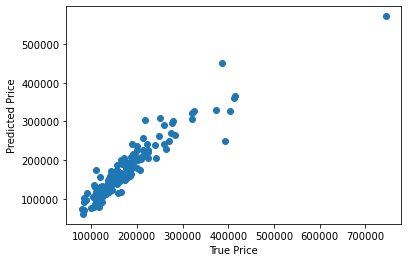

In [16]:
plt.scatter(y_test,x_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

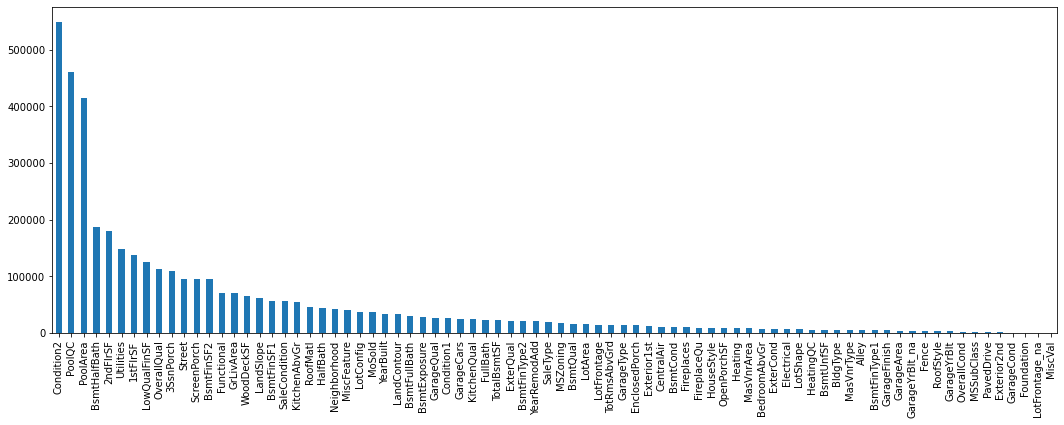

In [17]:
importance = pd.Series(np.abs(house_pipe.named_steps['lasso'].coef_))
importance.index = list(final_columns)+['LotFrontage_na',  'GarageYrBlt_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))